<a href="https://colab.research.google.com/github/JihoKim1108/09_Python_NumPy_Module/blob/main/%EC%B1%95%ED%84%B06_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 결정 트리(decision tree)는 분류와 회귀 작업, 다중출력 작업도 가능한 다재다능한 머신러닝 알고리즘

* 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘

* 결정 트리는 랜덤 포레스트의 기본 구성 요소

* 배우는 것: 결정 트리의 훈련, 시각화, 예측 방법, CART 훈련 알고리즘, 트리에 규제를 가하는 방법, 회귀 문제에 적용하는 방법, 제약 사항 

# 6.1 결정 트리 학습의 시각화 

In [1]:
# 붓꽃 데이터셋에 DecisionTreeClassifier 훈련시키는 코드
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

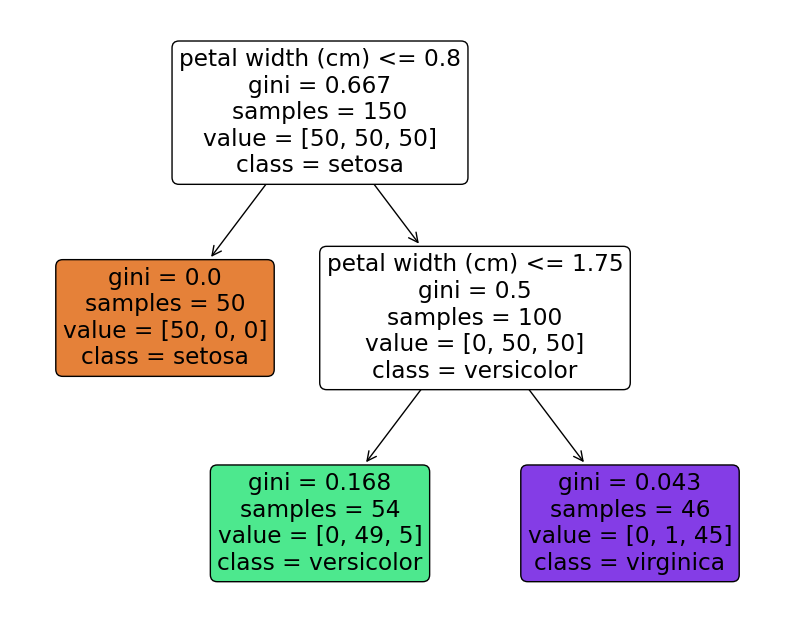

In [2]:
# 결정 트리 시각화
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # 플롯의 크기를 조절합니다.
plot_tree(tree_clf, 
          filled=True, 
          rounded=True, 
          feature_names=iris.feature_names[2:], 
          class_names=iris.target_names)

plt.show()

# 6.2 예측하기 

* 루트 노드(root node): 깊이가 0인 맨 꼭대기의 노드 

* 리프 노드(leaf node): 자식 노드를 가지지 않는 노드 

* 조건을 만족하면 왼쪽의 자식 노드로 이동, 만족하지 못하면 오른쪽의 자식 노드로 이동 

* 결정 트리의 장점: 데이터 전처리가 거의 필요하지 않다는 것. 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않다 

* 노드의 sample 속성: 얼마나 많은 훈련 샘플이 적용되었는가? 

* 노드의 gini 속성: 불순도(impurity) 측정 

* 사이킷런은 이진 트리만 만드는 CART 알고리즘을 사용한다. 그러므로 리프 노드 외에 모든 노드는 자식 노드를 두 개씩 가진다 

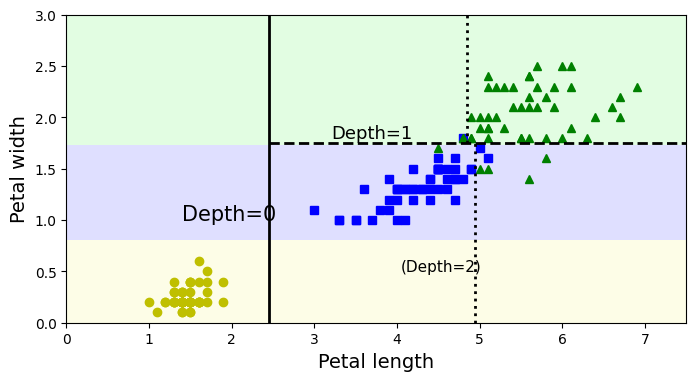

In [3]:
#@title <그림 6-2. 결정 트리의 결정 경계> 생성 코드
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

* 모델 해석: 화이트박스와 블랙박스

 > * 화이트박스(white box) 모델: 직관적이고 결정 방식을 이해하기 쉬운 모델
 > * 블랙박스(black box) 모델: 모델의 예측을 설명하기 어려운 모델 

# 6.3 클래스 확률 추정 

* 결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있다 

* 먼저 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환 


In [4]:
# 예를 들어 길이가 5cm이고 너비가 1.5cm인 꽃잎 가정
tree_clf.predict_proba([[5, 1.5]])
# 클래스 1이 확률이 가장 높다 

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
# 클래스 예측
tree_clf.predict([[5, 1.5]])

array([1])

# 6.4 CART 훈련 알고리즘 

* 사이킷런은 결정 트리를 훈련시키기 위해(즉, 트리를 성장시키기 위해) CART(classification and regression tree) 알고리즘을 사용 

* 훈련 세트를 하나의 특성과 임곗값을 사용해 두 개의 서브셋으로 나눈다 

* 어떻게 특성과 임곗값을 고르는가?
> 가장 순수한 서브셋으로 나눌 수 있는 (특성, 임곗값)짝을 찾는다 

* 이 알고리즘이 최소화해야 하는 비용 함수는 [식 6-2] 와 같다 

*식 6-2: 분류에 대한 CART 비용 함수*

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
&\text{여기에서 }\begin{cases}
G_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 불순도}\\
m_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 샘플 수}
\end{cases}
\end{split}
$

* 이 알고리즘은 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 된다 

* CART 알고리즘은 탐욕적 알고리즘(greedy algorithm)이다. 따라서 납득할 만한 훌륭한 솔루션을 만들지만 최적의 솔루션을 보장하지는 않는다. 

# 6.5 계산 복잡도

* 예측을 하려면 결정 트리를 루트 노드에서부터 리프 노드까지 탐색해야 한다 

* 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하다 

* 그래서 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르다 

# 6.6 지니 불순도 또는 엔트로피? 

* 기본적으로 지니 불순도가 사용되지만 criterion="entropy"로 지정하여 엔트로피 불순도를 사용할 수 있다 

* 열역학에서 분자가 안정되고 질서 정연하면 엔트로피가 0에 가깝다 

* 머신러닝에서는 불순도의 측정 방법으로 자주 사용된다. 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0이다 

* 감소되는 엔트로피의 양을 종종 정보 이득(information gain)이라고 부르는데 일반적으로 머신러닝에서 정보 이득을 말할 때는 쿨백-라이블러 발산을 뜻한다 

* 지니 불순도와 엔트로피 중 어떤 것을 사용해야 하는가? 실제로는 큰 차이가 없다. 즉, 둘다 비슷한 트리를 만들어 낸다. 지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋다

* 그러나 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형 잡힌 트리를 만든다 


# 6.7 규제 매개변수

* 결정 트리는 훈련 데이터에 대한 제약 사항이 거의 없어서 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽다 

* 비파라미터 모델(nonparametric model): 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유로운 모델(결정 트리 등) 

* 파라미터 모델(parametric model): 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합도리 위험이 줄어들지만 과소적합될 위험은 커진다(선형 모델 등)

* 규제 매개변수(결정 트리의 자유도 제한)
> * min_samples_split= : 분할되기 위해 노드가 가져야 하는 최소 샘플 수 
  * min_samples_leaf= : 리프 노드가 가지고 있어야 할 최소 샘플 수 
  * min_weight_fraction_leaf= : min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율 
  * max_leaf_nodes= : 리프 노드의 최대 수
  * max_features= : 각 노드에서 분할에 사용할 특성의 최대 수 
  * min_으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시키면 모델의 규제가 커진다 

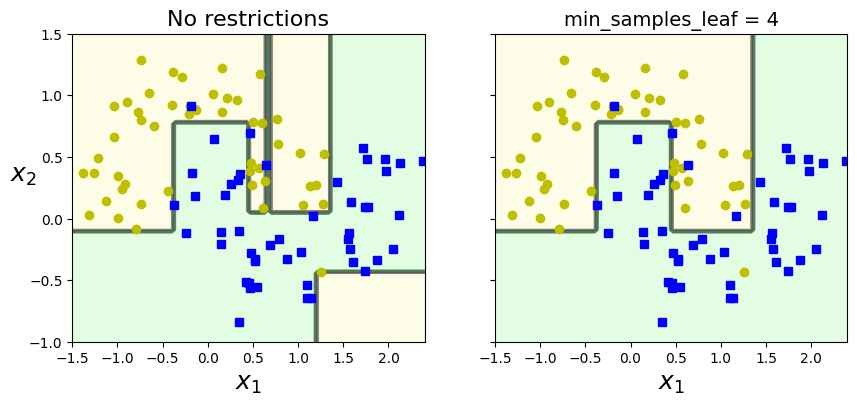

In [6]:
#@title <그림 6-3. min_samples_leaf 매개변수를 사용한 규제> 생성 코드
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

* 왼쪽 모델은 확실히 과대적합 
* 오른쪽 모델은 일반화 성능이 더 좋을 것 같아 보인다 

# 6.8 회귀

In [19]:
# 잡음이 섞인 2차 함수 형태의 데이터셋 
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

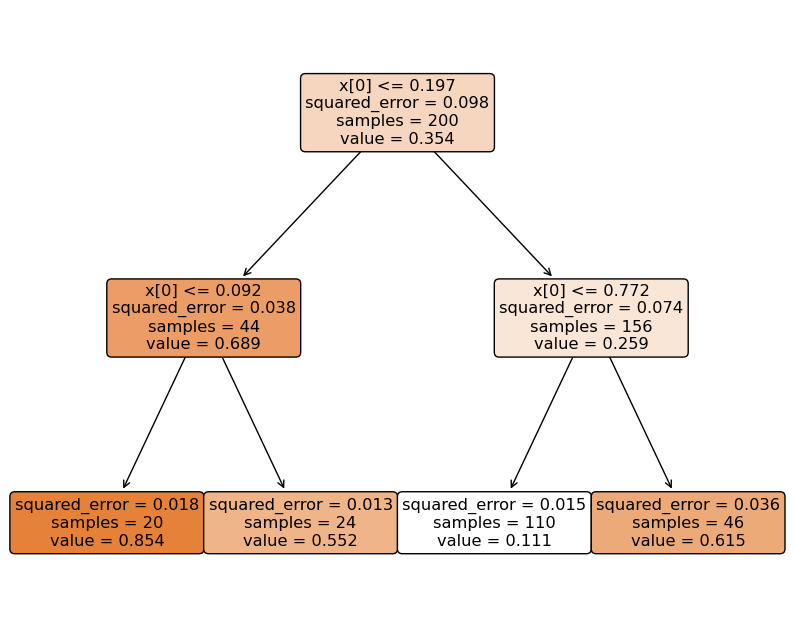

In [22]:
# 시각화 
plt.figure(figsize=(10, 8))  # 플롯의 크기를 조절합니다.
plot_tree(tree_reg, 
          filled=True, 
          rounded=True, 
          )

plt.show()

* 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측함 

* 예를 들어 x=0.6인 샘플의 타깃값을 예측한다고 가정
> * 루트 노드부터 시작해서 트리를 순회하면 결국 value=0.111인 리프 노드에 도달 한다 
  * 이 리프 노드에 있는 110개 훈련 샘플의 평균 타깃값이 예측값이 된다 
  * 이 예측값을 사용해 110개 샘플에 대한 MSE를 계산하면 0.015가 된다 

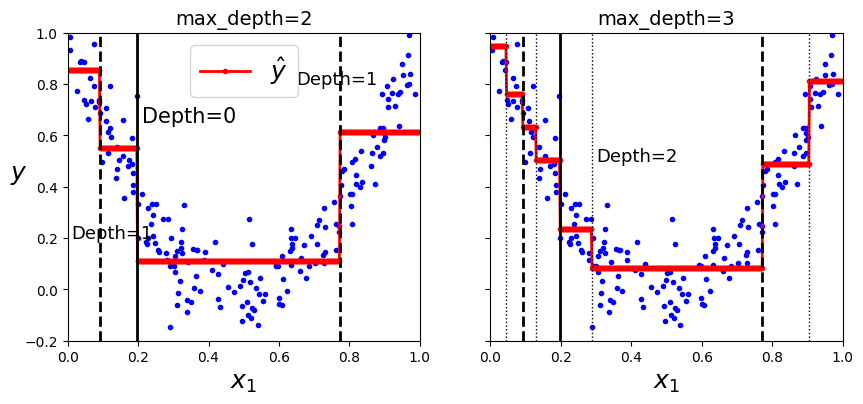

In [23]:
#@title <그림 6-5. 두 개의 결정 트리 회귀 모델의 예측> 생성 코드
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

#("tree_regression_plot")
plt.show()

* 각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균이 된다 

* 알고리즘은 예측값과 가능한 많은 샘플이 가까이 있도록 영역을 분할한다 

* CART 알고리즘은 훈련 세트를 불순도를 최소화하는 방향으로 분할하는 대신 MSE를 최소화하도록 분할하는 것을 제외하고는 앞서 설명한 것과 거의 비슷하게 작동한다 

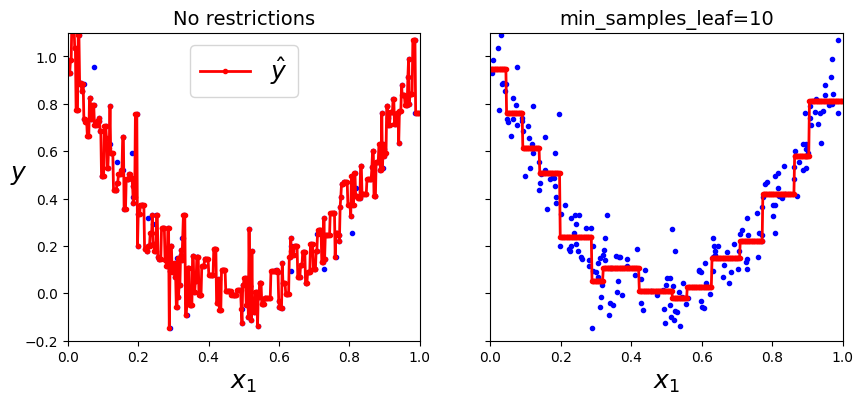

In [24]:
#@title <그림 6-6. 결정 트리 회귀 모델의 규제> 생성 코드
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()

* 회귀 작업 또한 결정 트리가 과대적합되기 쉽다 

* 규제가 있는 오른쪽이 훨씬 그럴싸하다 

# 6.9 불안정성

* 결정 트리의 장점: 이해하고 해석하기 쉽다, 사용하기 편하다, 여러 용도 사용 가능하다, 성능도 뛰어나다 

* 단점: 결정 트리는 계단 모양의 결정 경계를 만든다.(모든 분할은 축에 수직이다) 그래서 훈련 세트의 회전에 민감하다(훈련 데이터에 있는 작은 변화에도 매우 민감하다)

* 이런 문제를 해결하는 한 가지 방법은 PCA 기법을 사용하는 것 



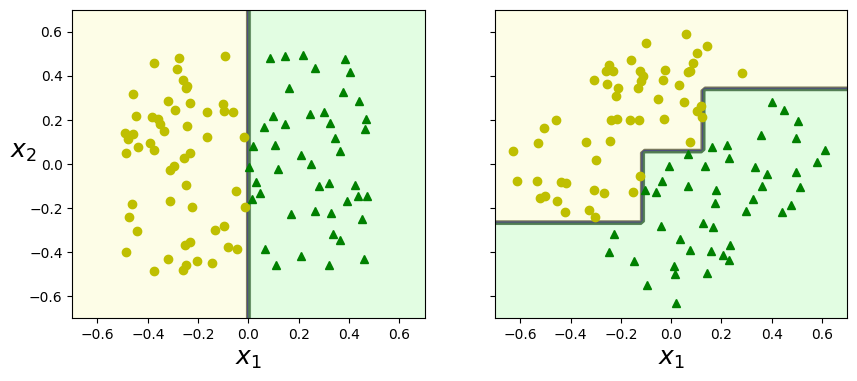

In [27]:
#@title <그림 6-7. 훈련 세트의 회전에 민감한 결정 트리> 생성 코드
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

#save_fig("sensitivity_to_rotation_plot")
plt.show()